In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [124]:
def load_data(model, dataset, filename):
    accuracy_path = f'accuracy/{filename}_data_{dataset}_arch_{model}/'
    search_path = f'search/{filename}_data_{dataset}_arch_{model}/'

    results = {
        'accuracy' : dict(),
        'search'   : dict()
    }

    for policy in os.listdir(accuracy_path):
        results['accuracy'][policy[:-4]] = np.load(f'{accuracy_path}{policy}')
        results['search'][policy[:-4]] = np.load(f'{search_path}{policy}')

    policies = list(results['accuracy'].keys())

    print('==============================')
    print(f' Model    : {model}')
    print(f' Data     : {dataset}')
    print(f' Name     : {filename}')
    print(f' Policies : {len(policies)}')
    print('==============================')

    return results, policies

def plot_data(results, policies, k, mode, debug=True):
    """
    Plot the accuracy and privacy scores of the policies.

    Arguments:
    debug - If True, will print policies with values above 100 or
            non-default data type.
    """
    # Plot variables
    fig, (search, accuracy) = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle('The privacy and accuracy scores per policy')
    search.set_ylim(0.45, 0.7)

    marker = 'x'
    dot_color = 'blue'
    bar_color = 'gray'
    alpha = 1

    for i, policy in enumerate(policies):
        privacy_score = results['search'][policy]
        accuracy_score = -results['accuracy'][policy]

        if privacy_score.dtype == 'float64' and accuracy_score.dtype == 'float64':
            if any(x > 100 for x in accuracy_score):
                if debug:
                    print(f'{policy} has values over 100...')
            else:
                func = eval(f'np.{mode}')
                if k > 1:
                    search.plot(i, func(privacy_score), marker, color=dot_color, alpha=alpha)
                    accuracy.plot(i, func(accuracy_score), marker, color=dot_color, alpha=alpha)
                else:
                    search.bar(int(policy), func(privacy_score), color=bar_color)
                    accuracy.plot(int(policy), func(accuracy_score), marker, color=dot_color, alpha=alpha)
        
        elif debug:
            print(f'{privacy_score.dtype} and {accuracy_score.dtype} type detected in policy {policy}...')

    # Mark the 5 lowest values red (only for k=1; S_pri)
    if k == 1:
        for policy in get_lowest_value(results, 5, func):
            search.bar(int(policy), func(results['search'][policy]), color='red', alpha=alpha)

    search.set_xlabel('Policies')
    search.set_ylabel('Privacy score')
    search.set_title(f'The {mode} value of the privacy scores per policy')

    accuracy.set_xlabel('Policies')
    accuracy.set_ylabel('Accuracy score')
    accuracy.set_title(f'The {mode} value of the accuracy scores per policy')

    plt.show()

def get_lowest_value(results, n_lowest, func):
    """
    Returns the n policies with the lowest privacy score.
    """
    temp = {key : func(value) for key, value in results['search'].items()}
    keys = list(temp.keys())
    values = list(temp.values())
    res = sorted(range(len(values)), key = lambda sub: values[sub])[:n_lowest]
    return list(map(keys.__getitem__, res))



 Model    : ResNet20-4
 Data     : cifar100
 Name     : k1
 Policies : 50


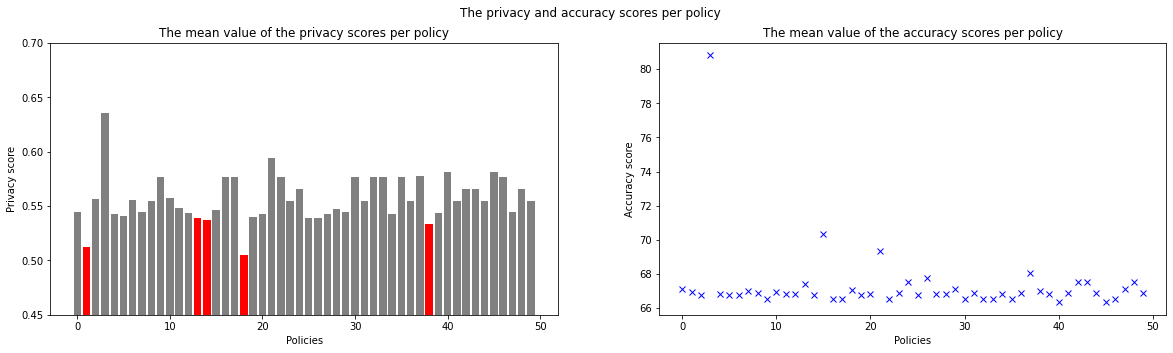

In [123]:
k = 1
model = 'ResNet20-4'
dataset = 'cifar100'
filename = f'k{k}'

results, policies = load_data(model, dataset, filename)
plot_data(results, policies, k, 'mean', debug=True)
